Auteurs : 


*   Gabin Marc Mberi-Kongo 
*   Quentin Vigné
*   Florent Jakubowski



Enoncé : Evaluer les performances de différentes architectures de CNN et de RNN pour deux tâches :
- Analyse de sentiments
- Analyse marketing

# Analyse de sentiments

## Chargement des représentations vectorielles du sens des mots

Nous avons mis a disposition différents vecteurs de représentations des mots pré-entrainés. La classe vect_rep se charge d'instancier un objet capable de charger les représentations vectorielles pour les utiliser ensuite. 

La classe light_vect_rep est une adaptation de cette classe pour charger une représentation vectorielle plus lègère que celles considérées dans la classe vect_rep.

En effet les vecteurs de mots obtenus dans la classe vect_rep sont tous en dimensions 300. Tandis que ceux de la lasse light_vect_rep sont de dimension 50. 

Cela a été fait dans le but de pallier au limitation de RAM des sessions google Colab et pour réussir à utiliser deux représentations vectorielles pré-entrainées pour l'architechture du CNN multichannel. Sans cette adapatation il est impossible d'entrianer un CNN avec une couche statique et une couche entrainable de plongement de mots.

In [1]:
import pandas as pd
import numpy as np
import os.path

class vect_rep:
  def __init__(self, argument, del_data = False):
    method_load_name = 'load_' + argument
    method_load = getattr(self, method_load_name, lambda:'error')
    # Téléchargement des représentations vectorielles du sens des mots
    method_load()
    self.data.head()
    self.vocabulary = list(self.data[0].values)
    # Création d'un dictionnaire pour matcher rapidement un mot avec son id dans le vocabulaire
    self.dictionnary = {}
    for i, word in enumerate(self.vocabulary):
      self.dictionnary[word] = i
    # Ajout du token de padding au vocabulaire et du vecteur correspondant
    self.vocabulary += ["<PAD>"]
    self.vectors = np.array(list(self.data[range(1, 301)].values) + [np.zeros(300)])
    del(self.data)
    if del_data == True : 
      method_del_name = 'del_' + argument
      method_del = getattr(self, method_del_name, lambda:'error')
      method_del()
  
  def load_Glove(self):
    if not os.path.isfile("glove.42B.300d.txt"):
      # https://nlp.stanford.edu/projects/glove/
      ! wget http://nlp.stanford.edu/data/glove.42B.300d.zip
      ! unzip glove.42B.300d.zip 
    self.data = pd.read_csv("glove.42B.300d.txt", sep=" ", quoting=3, header=None, skiprows=1)

  def load_Glove_6B(self):
    #http://nlp.stanford.edu/data/glove.6B.zip
    if not os.path.isfile("glove.6B.zip"):
      ! wget http://nlp.stanford.edu/data/glove.6B.zip
      ! unzip glove.6B.zip
    self.data = pd.read_csv("glove.6B.300d.txt", sep=" ", quoting=3, header=None, skiprows=1)

  def load_Skip_Gram(self):
    if not os.path.isfile("wiki-news-300d-1M.vec"):
      # https://fasttext.cc/docs/en/english-vectors.html
      ! wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
      ! unzip wiki-news-300d-1M.vec.zip
    self.data = pd.read_csv("wiki-news-300d-1M.vec", sep=" ", quoting=3, header=None, skiprows=1)
  
  def load_random(self):
    if not os.path.isfile("wiki-news.en.500k.vec"):
      ! wget http://chirouble.univ-lyon2.fr/~aguille/wiki-news.en.500k.vec.zip
      ! unzip wiki-news.en.500k.vec.zip
    self.data = pd.read_csv("wiki-news.en.500k.vec", sep=" ", quoting=3, header=None, skiprows=1)
    rng = np.random.default_rng()
    for i in range(1,301):
      self.data[i] = (2 * rng.random((500000)) - 1)
  
  def load_default(self):
    if not os.path.isfile("wiki-news.en.500k.vec"):
      ! wget http://chirouble.univ-lyon2.fr/~aguille/wiki-news.en.500k.vec.zip
      ! unzip wiki-news.en.500k.vec.zip
    self.data = pd.read_csv("wiki-news.en.500k.vec", sep=" ", quoting=3, header=None, skiprows=1)

  def del_Glove(self):
    !rm glove.42B.300d.txt
    !rm glove.42B.300d.zip
  def del_Skip_Gram(self):
    !rm wiki-news-300d-1M.vec
    !rm wiki-news-300d-1M.vec.zip
  def del_random(self):
    self.del_default()
  def del_default(self):
    !rm wiki-news.en.500k.vec
    !rm wiki-news.en.500k.vec.zip

  def get_vector(word):
    if word in self.vocabulary:
      return vectors[vocabulary.index(word)]
    else:
      return vectors[-1]


In [2]:
import pandas as pd
import numpy as np
import os.path

class light_vect_rep:
  def __init__(self, del_data = False):
    self.del_data = del_data
    #http://nlp.stanford.edu/data/glove.6B.zip
    if not os.path.isfile('glove.6B.zip'):
      ! wget http://nlp.stanford.edu/data/glove.6B.zip
      ! unzip glove.6B.zip
    self.data = pd.read_csv("glove.6B.50d.txt", sep=" ", quoting=3, header=None, skiprows=1)
    self.data.head()
    self.vocabulary = list(self.data[0].values)
    # Création d'un dictionnaire pour matcher rapidement un mot avec son id dans le vocabulaire
    self.dictionnary = {}
    for i, word in enumerate(self.vocabulary):
      self.dictionnary[word] = i
    # Ajout du token de padding au vocabulaire et du vecteur correspondant
    self.vocabulary += ["<PAD>"]
    self.vectors = np.array(list(self.data[range(1, 51)].values) + [np.zeros(50)])
    del(self.data)
    if self.del_data == True : 
      !rm glove.6B.50d.txt
      !rm glove.6B.100d.txt
      !rm glove.6B.150d.txt
      !rm glove.6B.200d.txt
      !rm glove.6B.300d.txt
      !rm glove.6B.zip

## Chargement des données

Les fichiers de données étant trop volumineux nous n'avons pas réussi à les charger sur github ou un repository distant. Il suffit d'avoir les fichiers nécessaires dans son environnement d'éxécution. Ici nous les avons stocké sur notre google drive pour résoudre ce problème.

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd 'drive/My Drive/'

/content/drive/My Drive


In [5]:
cd 'Colab Notebooks/Representation Learning/Projet/datasets/'

/content/drive/My Drive/Colab Notebooks/Representation Learning/Projet/datasets


### chargement des données Reviews (classification binaire)

In [6]:
reviews_train = pd.read_csv('reviews.train.csv')
reviews_test = pd.read_csv('reviews.test.csv')
reviews_train.head()
print(reviews_test.columns)

Index(['Unnamed: 0', 'review', 'polarity'], dtype='object')


### chargement des données Articles (multiclasse)

In [6]:
articles_train = pd.read_csv('articles.train.csv')
articles_test = pd.read_csv('articles.test.csv')
articles_train.head()
print(articles_test.columns)

Index(['Unnamed: 0', 'text', 'objective'], dtype='object')


## Mise en forme de la données

In [7]:
from nltk.tokenize import wordpunct_tokenize
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

class data: 
  def __init__(self, vect_rep, data_train, data_test, dataset_name):
    self.vect_rep = vect_rep
    self.data_train = data_train
    self.data_test = data_test
    self.dataset_name = dataset_name

  def process(self ):
    if self.dataset_name == 'reviews' : 
      self.texts_data_train = [text.lower().replace("<br />", " ") for text in self.data_train.review.values]
      self.texts_data_test = [text.lower().replace("<br />", " ") for text in self.data_test.review.values]
      self.polarities_train = self.data_train.polarity.values
      self.polarities_test = self.data_test.polarity.values

    if self.dataset_name == 'articles' : 
      self.texts_data_train = [text.lower().replace("<br />", " ") for text in self.data_train.text.values]
      self.texts_data_test = [text.lower().replace("<br />", " ") for text in self.data_test.text.values]
      self.objective_train = self.data_train.objective.values
      self.objective_test = self.data_test.objective.values

  def tokenise(self):
    self.pad_id = len(self.vect_rep.vocabulary) - 1

    self.tokenized_texts_data_train = [[self.vect_rep.dictionnary.get(token, self.pad_id) for token in wordpunct_tokenize(text)] for text in self.texts_data_train]
    self.length_data_train = [len(text) for text in self.tokenized_texts_data_train]

    self.tokenized_texts_data_test = [[self.vect_rep.dictionnary.get(token, self.pad_id) for token in wordpunct_tokenize(text)] for text in self.texts_data_test]
    self.length_data_test = [len(text) for text in self.tokenized_texts_data_test]

  def plot(self):
    plt.hist(self.length_data_train, bins=50)
    plt.show()
    plt.hist(self.length_data_test, bins=50)
    plt.show()
  
  def padding(self):
    self.max_length = 512
    self.X_train = pad_sequences(self.tokenized_texts_data_train,
                      maxlen=max_length,
                      truncating="pre",
                      padding="post",
                      value=self.pad_id)

    self.X_test = pad_sequences(self.tokenized_texts_data_test,
                      maxlen=max_length,
                      truncating="pre",
                      padding="post",
                      value=self.pad_id)
    
  def encoding_labels(self):
    if self.dataset_name == 'reviews' : 
      encoder_train = OneHotEncoder()
      encoder_test = OneHotEncoder()
      self.y_train = encoder_train.fit_transform(self.polarities_train.reshape(-1, 1)).toarray()
      self.y_test = encoder_test.fit_transform(self.polarities_test.reshape(-1, 1)).toarray()
    if self.dataset_name == 'articles' :
      lb = preprocessing.LabelBinarizer()
      lb.fit(articles_train['objective'].values)
      lb.classes_
      self.y_train = lb.transform(self.data_train['objective'].values)
      self.y_test = lb.transform(self.data_test['objective'].values)
      print(self.y_train)

  

## Conception du réseau de neurones convolutifs



### Classe embedding layer

In [8]:
import tensorflow.keras as k

class embedding_layer:
  def __init__(self, my_vect_rep):
    self.my_vect_rep = my_vect_rep
    self.len_vocab = len(self.my_vect_rep.vocabulary)

  def set_vect_rep(self, my_vect_rep):
    self.my_vect_rep = my_vect_rep
    self.len_vocab = len(self.my_vect_rep.vocabulary)
    
  def create_embedding_layer(self, is_trainable, word_input_layer):
    return k.layers.Embedding(input_dim = self.len_vocab,
                              output_dim=300, # dimension de représentation des mots
                              weights=[self.my_vect_rep.vectors], # poids de la couche = représentations pré-entraînées
                              trainable=is_trainable)(word_input_layer)
                              
  def create_lightweight_embedding_layer(self, is_trainable, word_input_layer):
    return k.layers.Embedding(input_dim = self.len_vocab,
                              output_dim=50, # dimension de représentation des mots
                              weights=[self.my_vect_rep.vectors], # poids de la couche = représentations pré-entraînées
                              trainable=is_trainable)(word_input_layer)



### Classe CNN

In [9]:
class create_CNN:
  def __init__(self, is_multichannel, is_trainable):
    self.is_multichannel = is_multichannel
    self.is_trainable = is_trainable

  def set_vect_rep(self, method = 'default', del_data = False):
    if self.is_multichannel:
      self.vect_rep = light_vect_rep(del_data)
    else:
      self.vect_rep = vect_rep(method, del_data)

  def create_input_layer(self, max_length):
    self.input_layer = k.layers.Input(shape=(max_length,))

  def create_embedded_layer_part(self):
    if not self.is_multichannel:
      emb_layer = embedding_layer(self.vect_rep)
      self.single_emb_layer = emb_layer.create_embedding_layer(self.is_trainable, self.input_layer)
    else :
      layer_static = embedding_layer(self.vect_rep)
      self.multi_emb_layer_static = layer_static.create_lightweight_embedding_layer(is_trainable = False, 
                                                                           word_input_layer = self.input_layer)
      layer_non_static = embedding_layer(self.vect_rep)
      self.multi_emb_layer_non_static = layer_non_static.create_lightweight_embedding_layer(is_trainable = True, 
                                                                           word_input_layer = self.input_layer)
  
  def create_conv_layers(self, n_filters, filter_sizes, activation):
    self.n_filters = n_filters
    self.filter_sizes = filter_sizes
    self.conv_activation = activation
    self.pooled_outputs = []

    if self.is_multichannel:
      for size in self.filter_sizes:
        self.convolution_layer_1 = k.layers.Conv1D(self.n_filters, 
                                            kernel_size=size,
                                            activation=self.conv_activation)(self.multi_emb_layer_static)
        self.convolution_layer_2 = k.layers.Conv1D(self.n_filters, 
                                      kernel_size=size, 
                                      activation=self.conv_activation)( self.multi_emb_layer_non_static)
        #sum result of both previous conv layers
        self.convolution_layer = k.layers.Add()([self.convolution_layer_1, self.convolution_layer_2])
        self.pooled_output = k.layers.GlobalMaxPooling1D()(self.convolution_layer)
        self.pooled_outputs.append(self.pooled_output)
      self.feature_map = k.layers.Concatenate()(self.pooled_outputs)

    else:
      for size in self.filter_sizes:
        self.convolution_layer = k.layers.Conv1D(self.n_filters, 
                                          kernel_size=size,
                                          activation=self.conv_activation)(self.single_emb_layer)
        self.pooled_output = k.layers.GlobalMaxPooling1D()(self.convolution_layer)
        self.pooled_outputs.append(self.pooled_output)
      self.feature_map = k.layers.Concatenate()(self.pooled_outputs) 

  def create_dropout_layer(self, params):
    self.dropout_params = params
    self.dropout_layer = k.layers.Dropout(self.dropout_params)(self.feature_map)

  def create_output_layer(self, nb_class, activation):
    self.nb_class = nb_class
    self.output_activation = activation
    self.classification_layer = k.layers.Dense(units= self.nb_class,
                                      activation= self.output_activation)(self.dropout_layer)
  
  def return_model(self):
    return k.Model(inputs=self.input_layer, outputs=self.classification_layer)


### RNN

In [12]:
import tensorflow.keras as k

class create_RNN:
  def __init__(self, is_emb_trainable, is_bidirectionnal, rnn_type):
    self.is_trainable = is_emb_trainable
    self.is_bidirectionnal = is_bidirectionnal
    self.rnn_type = rnn_type 

  def create_input_layer(self, max_length):
    self.input_layer = k.layers.Input(shape=(max_length, ))
  
  def set_vect_rep(self, method = 'default', del_data = False):
    self.vect_rep = vect_rep(method, del_data)

  def create_embedding_layer(self):
    emb_layer_object = embedding_layer(self.vect_rep)
    self.emb_layer = emb_layer_object.create_embedding_layer(self.is_trainable, self.input_layer)

  def create_RNN_layer(self, dimension, recurrent_initializer="orthogonal", bias_initializer="ones", dropout=0.2):
    def gru_layer():
      return k.layers.GRU(units=dimension, # dimension de l'état caché
                                      recurrent_initializer=recurrent_initializer,
                                      bias_initializer=bias_initializer,
                                      dropout=dropout)(self.emb_layer)
    def lstm_layer():
      return k.layers.LSTM(units=dimension, # dimension de l'état caché
                          recurrent_initializer=recurrent_initializer,
                          bias_initializer=bias_initializer,
                          dropout=dropout)(self.emb_layer)
    switcher = {
        'gru' : gru_layer,
        'lstm' : lstm_layer
    }
    if self.is_bidirectionnal : 
      if self.rnn_type == 'gru':
        gru_layer = k.layers.Bidirectional( k.layers.GRU(units = dimension, 
                                                             recurrent_initializer="orthogonal", 
                                                             bias_initializer="ones", 
                                                             return_sequences=True,
                                                              go_backwards = True,
                                                             dropout=0.2))(self.emb_layer)
        self.rnn_layer = k.layers.Bidirectional( k.layers.GRU(units = dimension))(gru_layer)
      elif self.rnn_type == 'lstm':
        lstm_layer = k.layers.Bidirectional( k.layers.LSTM(units = dimension, 
                                                             recurrent_initializer="orthogonal", 
                                                             bias_initializer="ones", 
                                                             return_sequences=True,
                                                              go_backwards = True,
                                                             dropout=0.2))(self.emb_layer)
        self.rnn_layer = k.layers.Bidirectional( k.layers.LSTM(units = dimension))(lstm_layer)
      else: print("Invalid or no rnn_type")
    else : 
      self.rnn_layer = switcher.get(self.rnn_type, "Invalid or no rnn_type")()
      
    print(self.rnn_layer)
                
  def create_dropout_layer(self, arg):
    self.dropout_layer = k.layers.Dropout(arg)(self.rnn_layer)
  
  def create_output_layer(self, nb_class, activation):
    self.nb_class = nb_class
    self.output_activation = activation
    self.classification_layer = k.layers.Dense(units= self.nb_class,
                                      activation= self.output_activation)(self.dropout_layer)
  
  def return_model(self):
    return k.Model(inputs=self.input_layer, outputs=self.classification_layer)


# Création des modèles

Les modèles sont nommés de la manière suivante :    
*A1_A2_A3_VR_T*  
A1 = (architecture details 1) type d'architecture   
A2 = (architecture details 2) précision supplémentaire sur le type d'architecture si nécessaire   
A3 = (architecture details 3) nouvelle précision supplémentaire si nécessaire  
VR = (vector representation) représentation pré-entrainées choisie, si pertinent  
T = (trainable) nature de la couche de représentation des mots, statiques ou entrainable, si pertinent


exemple et précisions : 
- CNN_random_static : (A1_VR_T) Architecture CNN, avec une représentation vectorielle randomisée, et une couche d'embedding static.
- CNN_multichannel : (A1_A2) Architecture CNN multichannel,pas besoin de plus de précision étant donné que nous avons codé cette architecture de manière  "figée", les représentations vectorielles ainsi que la nature des couches d'embedding ne peuvent être modifiées. 
Pour précision ce sont des représentation GloVe de dimension 50, une couche de plongement est entrainable et l'autre non. 
- RNN_GRU_default_static : (A1_A2_VR_T) Architecture RNN de type Gru, représentaiton vectorielle par défaut utilisée en TP. La couche de représentation est statique.
-RNN_GRU_bidir_default_static : (A1_A2_A3_VR_T) Architecture RNN de type Gru bidirectionnelle, représentation vectorielle par défaut, couche de plongement statique.


## Optimisation des hyperparamètres 

Afin de trouver les hyper paramètres les plus adaptés à nos modèles nous avons mis en place une fonction de tuning via le tuner proposé par Keras.

Pour le CNN : 
* n_filters : 300 / filter size : [9, 10, 11, 12] / dropout : 0.5

Pour le RNN : Gru
* La première fois on trouve dim_gru : 200 / dropout = 0.6
* La seconde fois on trouve dim_gru : 210 / dropout = 0.4

On trouve ces résultats finaux : [test loss, test accuracy]: [0.23279231786727905, 0.9124000072479248]

Ci-dessous vous trouverez le code correspondant au tuning du RNN avec GRU.

In [ ]:
# Importer la librairie
try:
  !pip install keras-tuner
except:
  print("Déjà installée")

#### Création du tuner 
On vient créer notre tuner qui est basé sur la fonction build_model qui prends en paramètre hp contenant les hyperparamètre à optimiser.

Entraîner via le tuner prends du temps, si vous souhaitez tester cette partie du code il faut compter 1h de tuning.

In [ ]:
def build_model(hp):
  max_length = 512
  output_activation = "softmax"
  gru_dimension = hp.Int('gru_dimension',
                        min_value=10,
                        max_value=250,
                        step = 40)
  lstm_dimension = 10

  # RNN_GRU_default_static accuracy = 0.8831 after 10 epochs
  RNN_GRU_default_static = create_RNN(is_emb_trainable = False, is_bidirectionnal = False, rnn_type = 'gru')
  RNN_GRU_default_static.create_input_layer(max_length)
  RNN_GRU_default_static.set_vect_rep()
  RNN_GRU_default_static.create_embedding_layer()
  RNN_GRU_default_static.create_RNN_layer(dimension = gru_dimension)
  RNN_GRU_default_static.create_dropout_layer(hp.Float('dropout',
                                                        min_value=0.4,
                                                        max_value=0.6,
                                                        step = 0.1))
  RNN_GRU_default_static.create_output_layer(2, output_activation)
  
  model = RNN_GRU_default_static.return_model()
  model.compile(loss="categorical_crossentropy", 
                  optimizer="adam",
                  metrics=["accuracy"])
  # Allow creation of data_bin
  models_binary_clf['RNN_GRU_default_static'] = RNN_GRU_default_static
  return model

In [ ]:
from kerastuner.tuners import RandomSearch
from kerastuner.tuners import Hyperband

max_length = 512
models_binary_clf = {}

tuner = Hyperband(build_model,
                  objective='val_accuracy',
                  max_epochs=10,
                  factor=3,
                  project_name='HyperbandRNN')

tuner.search_space_summary()

#### Importation des données

In [ ]:
data_bin = data(models_binary_clf['RNN_LSTM_Skip_Gram_static'].vect_rep, reviews_train, reviews_test, 'reviews')
data_bin.process()
data_bin.tokenise()
data_bin.padding()
data_bin.encoding_labels()

In [ ]:
tuner.search(data_bin.X_train, 
             data_bin.y_train,
             validation_split=0.2,
             epochs=50,
             callbacks=[keras.callbacks.EarlyStopping('val_loss', patience=5)])

#### Récupération hyperparamètre

In [ ]:
best_model = tuner.get_best_models(num_models=1)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(f""" Fin de la recherche d'hyperparamètre. Le nombre optimal de dimension GRU est {best_hps.get('gru_dimension')}
      et le nombre optimal pour la couche de dropout est {best_hps.get('dropout')}.""")

### Première fois : 100 à 600
# 200 Gru_dim
# 0.6 Dropout

### Deuxième fois : 10 à 250
# 210 Gru_dim
# 0.4 Dropout

#### Construction du modèle avec les hyperparamètre trouvés
On met un nombre d'epochs assez haut pour trouver la meilleur epoch.
Cela nous permettra d'entraîner sans risquer de faire du sur apprentissage.
Nous avons de base limité à 30 epochs car nous savons qu'au dessus cela ne nous servirai à rien, nous l'avons testé.

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 30 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(data_bin.X_train, 
                    data_bin.y_train, 
                    validation_split=0.2,
                    epochs=30)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

#### Incorportation du nombre d'epochs
Une fois le nombre d'epochs optimal trouvé on l'ajoute à l'entrainement

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(data_bin.X_train, 
                data_bin.y_train, 
                epochs=best_epoch)

#### Test

In [ ]:
eval_result = hypermodel.evaluate(data_bin.X_test, data_bin.y_test)
print("[test loss, test accuracy]:", eval_result)

#### Sauvegarde du modèle

In [ ]:
# Si on est satisfaits : 
nom_model = 'RNN_GRU_2'
hypermodel.save('./Model/'+nom_model')

Une fois que les hyperparamètres optimaux ont été trouvés pour les différents réseaux de neuronnes, nous pouvons procéder aux différentes tâches de classification.

## Dictionnaire de modèles pour la classification binaire

In [23]:
models_binary_clf = {}

La limite de RAM de Google Colab empêche de créer, compiler et entrainer beaucoup de modèles en une seule fois alors que le code écrit était prévu à cette effet. 
Les différents modèles sont donc en commentaires, il suffit de décommenter et d'éxécuter les cellules suivantes pour obtenir les performances.

Vous pouvez spécifier comme 2e argument dans la méthode set_vect des objets CNN ou RNN si vous voulez supprimer de votre environnement les fichiers et .zip téléchargés. Si plusieurs représentations sont téléchargées collab peut rapidement être à cours d'espace disque.

In [ ]:
#CNN classic paramaters
max_length = 512
filter_sizes = [9, 10, 11, 12] 
n_filters = 300
conv_activation = "tanh"
output_activation = "softmax"

#CNN_random_static accuracy on bin class : 0.8676 after 20 epochs
#CNN_random_static = create_CNN(is_multichannel = False, is_trainable = False)
#CNN_random_static.set_vect_rep('random')
#CNN_random_static.create_input_layer(max_length)
#CNN_random_static.create_embedded_layer_part()
#CNN_random_static.create_conv_layers(n_filters, filter_sizes, conv_activation)
#CNN_random_static.create_dropout_layer(0.5)
#CNN_random_static.create_output_layer(2, output_activation)

#CNN_default_static  accuracy on bin class : 0.9032 after 5 epochs
#CNN_default_static = create_CNN(is_multichannel = False, is_trainable = False)
#CNN_default_static.set_vect_rep('default')
#CNN_default_static.create_input_layer(max_length)
#CNN_default_static.create_embedded_layer_part()
#CNN_default_static.create_conv_layers(n_filters, filter_sizes, conv_activation)
#CNN_default_static.create_dropout_layer(0.5)
#CNN_default_static.create_output_layer(2, output_activation)

#CNN_default_non_static accuracy on bin class : 0.8968 after 5 epochs
#CNN_default_non_static = create_CNN(is_multichannel = False, is_trainable = True)
#CNN_default_non_static.set_vect_rep('default')
#CNN_default_non_static.create_input_layer(max_length)
#CNN_default_non_static.create_embedded_layer_part()
#CNN_default_non_static.create_conv_layers(n_filters, filter_sizes, conv_activation)
#CNN_default_non_static.create_dropout_layer(0.5)
#CNN_default_non_static.create_output_layer(2, output_activation)

#CNN_multichannel parameters
max_length = 512
filter_sizes = [9, 10, 11, 12] 
n_filters = 300
conv_activation = "tanh"
output_activation = "softmax"

#CNN_multichannel accuracy = 0.8622 after 20 epochs
#CNN_multichannel = create_CNN(is_multichannel = True, is_trainable = False)
#CNN_multichannel.create_input_layer(max_length)
#CNN_multichannel.set_vect_rep()
#CNN_multichannel.create_embedded_layer_part()
#CNN_multichannel.create_conv_layers(n_filters, filter_sizes, conv_activation)
#CNN_multichannel.create_dropout_layer(0.5)
#CNN_multichannel.create_output_layer(2, output_activation)

#ajout au dictionnaire
#models_binary_clf ['CNN_random_static'] = CNN_random_static
#models_binary_clf['CNN_default_static'] = CNN_default_static
#models_binary_clf['CNN_default_non_static'] = CNN_default_non_static
#models_binary_clf ['CNN_multichannel'] = CNN_multichannel

In [24]:
# RNN 
max_length = 512
output_activation = "softmax"
gru_dimension = 200
lstm_dimension = 10

#RNN_GRU_default_static accuracy = 0.8831 after 10 epochs
#RNN_GRU_default_static = create_RNN(is_emb_trainable = False, is_bidirectionnal = False, rnn_type = 'gru')
#RNN_GRU_default_static.create_input_layer(max_length)
#RNN_GRU_default_static.set_vect_rep()
#RNN_GRU_default_static.create_embedding_layer()
#RNN_GRU_default_static.create_RNN_layer(dimension = gru_dimension)
#RNN_GRU_default_static.create_dropout_layer(0.5)
#RNN_GRU_default_static.create_output_layer(2, output_activation)

#RNN_GRU_default_non_static accuracy = 0.8897 after 5 epochs
#RNN_GRU_default_non_static = create_RNN(is_emb_trainable = True, is_bidirectionnal = False, rnn_type = 'gru')
#RNN_GRU_default_non_static.create_input_layer(max_length)
#RNN_GRU_default_non_static.set_vect_rep()
#RNN_GRU_default_non_static.create_embedding_layer()
#RNN_GRU_default_non_static.create_RNN_layer(dimension = gru_dimension)
#RNN_GRU_default_non_static.create_dropout_layer(0.5)
#RNN_GRU_default_non_static.create_output_layer(2, output_activation)

#RNN_LSTM_Skip_Gram_static 
# 1) accuracy = 0.5049 after 9 epochs, dimension : 600, 
# 2) 0.4975 after 9 epochs, dimension : 1200
# 3) 0.5439 after 20 epochs, dimension : 10
#RNN_LSTM_Skip_Gram_static = create_RNN(is_emb_trainable = False, is_bidirectionnal = False, rnn_type = 'lstm')
#RNN_LSTM_Skip_Gram_static.create_input_layer(max_length)
#RNN_LSTM_Skip_Gram_static.set_vect_rep('Skip_Gram')
#RNN_LSTM_Skip_Gram_static.create_embedding_layer()
#RNN_LSTM_Skip_Gram_static.create_RNN_layer(dimension = lstm_dimension)
#RNN_LSTM_Skip_Gram_static.create_dropout_layer(0.5)
#RNN_LSTM_Skip_Gram_static.create_output_layer(2, output_activation)

#RNN_GRU_static_bidir accuracy = 0.8921 after 20 epochs
RNN_GRU_bidir_Skip_Gram_static = create_RNN(is_emb_trainable = False, 
                                            is_bidirectionnal = True, 
                                            rnn_type = 'gru')
RNN_GRU_bidir_Skip_Gram_static.create_input_layer(max_length)
RNN_GRU_bidir_Skip_Gram_static.set_vect_rep('Skip_Gram')
RNN_GRU_bidir_Skip_Gram_static.create_embedding_layer()
RNN_GRU_bidir_Skip_Gram_static.create_RNN_layer(dimension = gru_dimension)
RNN_GRU_bidir_Skip_Gram_static.create_dropout_layer(0.5)
RNN_GRU_bidir_Skip_Gram_static.create_output_layer(2, output_activation)

#ajout au dictionnaire
#models_binary_clf ['RNN_GRU_default_static'] = RNN_GRU_default_static
#models_binary_clf ['RNN_GRU_default_non_static'] = RNN_GRU_default_non_static
#models_binary_clf ['RNN_LSTM_Skip_Gram_static'] = RNN_LSTM_Skip_Gram_static
models_binary_clf['RNN_GRU_bidir_Skip_Gram_static'] = RNN_GRU_bidir_Skip_Gram_static

KerasTensor(type_spec=TensorSpec(shape=(None, 400), dtype=tf.float32, name=None), name='bidirectional_4/concat:0', description="created by layer 'bidirectional_4'")


## Dictionnaire de modèles pour la classifcation multiclasse

In [10]:
models_multiclass_clf = {}

In [11]:
#CNN classic paramaters
max_length = 512
filter_sizes = [9, 10, 11, 12] 
n_filters = 300
conv_activation = "tanh"
output_activation = "softmax"

#CNN_random_static 
#CNN_random_static = create_CNN(is_multichannel = False, is_trainable = False)
#CNN_random_static.set_vect_rep('random')
#CNN_random_static.create_input_layer(max_length)
#CNN_random_static.create_embedded_layer_part()
#CNN_random_static.create_conv_layers(n_filters, filter_sizes, conv_activation)
#CNN_random_static.create_dropout_layer(0.5)
#CNN_random_static.create_output_layer(4, output_activation)

#CNN_default_static  
CNN_Skip_Gram_static = create_CNN(is_multichannel = False, is_trainable = False)
CNN_Skip_Gram_static.set_vect_rep('Skip_Gram')
CNN_Skip_Gram_static.create_input_layer(max_length)
CNN_Skip_Gram_static.create_embedded_layer_part()
CNN_Skip_Gram_static.create_conv_layers(n_filters, filter_sizes, conv_activation)
CNN_Skip_Gram_static.create_dropout_layer(0.5)
CNN_Skip_Gram_static.create_output_layer(4, output_activation)

#CNN_default_non_static 
#CNN_default_non_static = create_CNN(is_multichannel = False, is_trainable = True)
#CNN_default_non_static.set_vect_rep('default')
#CNN_default_non_static.create_input_layer(max_length)
#CNN_default_non_static.create_embedded_layer_part()
#CNN_default_non_static.create_conv_layers(n_filters, filter_sizes, conv_activation)
#CNN_default_non_static.create_dropout_layer(0.5)
#CNN_default_non_static.create_output_layer(4, output_activation)

#CNN_multichannel parameters
max_length = 512
filter_sizes = [9, 10, 11, 12] 
n_filters = 300
conv_activation = "tanh"
output_activation = "softmax"

#CNN_multichannel 
#CNN_multichannel = create_CNN(is_multichannel = True, is_trainable = False)
#CNN_multichannel.create_input_layer(max_length)
#CNN_multichannel.set_vect_rep()
#CNN_multichannel.create_embedded_layer_part()
#CNN_multichannel.create_conv_layers(n_filters, filter_sizes, conv_activation)
#CNN_multichannel.create_dropout_layer(0.5)
#CNN_multichannel.create_output_layer(4, output_activation)

# ajout au dictionnaire
#models_multiclass_clf['CNN_random_static'] = CNN_random_static
models_multiclass_clf['CNN_Skip_Gram_static'] = CNN_Skip_Gram_static
#models_multiclass_clf['CNN_default_non_static'] = CNN_default_non_static
#models_multiclass_clf['CNN_multichannel'] = CNN_multichannel

In [ ]:
# RNN 
max_length = 512
output_activation = "softmax"
gru_dimension = 200
lstm_dimension = 10

#RNN_GRU_default_static 
#RNN_GRU_default_static = create_RNN(is_emb_trainable = False, is_bidirectionnal = False, rnn_type = 'gru')
#RNN_GRU_default_static.create_input_layer(max_length)
#RNN_GRU_default_static.set_vect_rep()
#RNN_GRU_default_static.create_embedding_layer()
#RNN_GRU_default_static.create_RNN_layer(dimension = gru_dimension)
#RNN_GRU_default_static.create_dropout_layer(0.5)
#RNN_GRU_default_static.create_output_layer(4, output_activation)

#RNN_GRU_default_non_static 
#RNN_GRU_default_non_static = create_RNN(is_emb_trainable = True, is_bidirectionnal = False, rnn_type = 'gru')
#RNN_GRU_default_non_static.create_input_layer(max_length)
#RNN_GRU_default_non_static.set_vect_rep()
#RNN_GRU_default_non_static.create_embedding_layer()
#RNN_GRU_default_non_static.create_RNN_layer(dimension = gru_dimension)
#RNN_GRU_default_non_static.create_dropout_layer(0.5)
#RNN_GRU_default_non_static.create_output_layer(4, output_activation)

# ajout au dictionnaire
#models_multiclass_clf['RNN_GRU_default_static'] = RNN_GRU_default_static
#models_multiclass_clf['RNN_GRU_default_non_static'] = RNN_GRU_default_non_static


## Compilation du modèle

Instancier un modèle d'après les couches créer précédemment. Le compiler avec une fonction de perte de type entropy croisée catégorielle (`categorical_crossentropy`) et l'optimiseur `"adam"`. Afficher le nombre de paramètres par couche avec la méthode `summary()`.

Classification binaire

In [25]:
print(models_binary_clf)
print(models_binary_clf.keys())
compiled_models_binary_clf = {key: None for key in models_binary_clf.keys()}
for key in models_binary_clf :
  print(key) 
  model = models_binary_clf[key].return_model()
  model.compile(loss="categorical_crossentropy", 
                                                  optimizer="adam",
                                                  metrics=["accuracy"])
  compiled_models_binary_clf[key] = model
  print(compiled_models_binary_clf[key] )
  compiled_models_binary_clf[key].summary()
  

{'RNN_GRU_bidir_Skip_Gram_static': <__main__.create_RNN object at 0x7f1f4140e110>}
dict_keys(['RNN_GRU_bidir_Skip_Gram_static'])
RNN_GRU_bidir_Skip_Gram_static
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 512)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 512, 300)          299998500 
_________________________________________________________________
bidirectional_3 (Bidirection (None, 512, 400)          602400    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 400)               722400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (N

Classification multiclasse

In [12]:
print(models_multiclass_clf)
print(models_multiclass_clf.keys())
compiled_models_multiclass_clf = {key: None for key in models_multiclass_clf.keys()}
for key in models_multiclass_clf :
  print(key) 
  model = models_multiclass_clf[key].return_model()
  model.compile(loss="categorical_crossentropy", 
                                                  optimizer="adam",
                                                  metrics=["accuracy"])
  compiled_models_multiclass_clf[key] = model
  print(compiled_models_multiclass_clf[key] )
  compiled_models_multiclass_clf[key].summary()
  

{'CNN_Skip_Gram_static': <__main__.create_CNN object at 0x7ff8dff26290>}
dict_keys(['CNN_Skip_Gram_static'])
CNN_Skip_Gram_static
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 512, 300)     299998500   input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 504, 300)     810300      embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 503, 300)     900300    

## Entraînement et évaluation des modèle

Le jeu de données est déjà découpé en deux échantillons, l'un pour l'entraînement et l'autre pour l'évaluation.

On mesure la précision globale sur les données d'évaluation à l'aide de la fonction `accuracy_score` de la bibliothèque scikit-learn (`sklearn.metrics.accuracy_score`). On utilise la fonction `argmax` de la bibliothèque `numpy` pour convertir au format catégoriel l'encodage binaire de `y` et convertir les probabilités inférées par le modèles en prédictions catégorielles.

## Classification binaire

### Chargement des données pour la classification binaire

Il est nécessaire de préciser la représentation vectorielle utilisée `vect_rep`

La représentation vectorielle est demandée car grâce à elle nous allons récupérer la longueur du vocabulaire fournis avec la représentation vectorielle. Pour ensuite pouvoir ajouter à la fin le token de padding et calculer son identifiant. 

Il est donc préférable à chaque fois que vous voulez entrainer des modèles utilisant des représentations vectorielles de tailles différentes, de recharger les données pour la classification binaire ou la clasification multiclasse en spécifiant la représentation vectorielle commune des modèles entrainés.

Par exemple lorsque l'on entraine le `CNN_multichannel`, la taille du vocabulaire utilisé et réduite et les vecteurs sont dans un espace de 50 dimensions. Ainsi il est nécessaire d'adapter les données chargées en recréant un objet `data` spécifique pour l'entrainement.

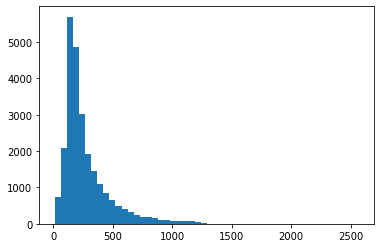

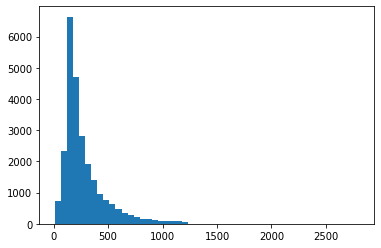

In [26]:
data_bin = data(models_binary_clf['RNN_GRU_bidir_Skip_Gram_static'].vect_rep, reviews_train, reviews_test, 'reviews')
data_bin.process()
data_bin.tokenise()
data_bin.plot()
data_bin.padding()
data_bin.encoding_labels()

### Entrainement des modèles binaires

In [27]:
for key in compiled_models_binary_clf :
  print(key)
  print(compiled_models_binary_clf[key])
  compiled_models_binary_clf[key].fit(x=data_bin.X_train,
          y=data_bin.y_train,
          batch_size=80,
          validation_split=0.33,
          epochs=20,
          verbose=1, callbacks=[k.callbacks.EarlyStopping('val_loss', patience=3)])

RNN_GRU_bidir_Skip_Gram_static
Epoch 1/20
210/210 [==============================] - 103s 287ms/step - loss: 0.9358 - accuracy: 0.5023 - val_loss: 0.6739 - val_accuracy: 0.6183
Epoch 2/20
210/210 [==============================] - 58s 276ms/step - loss: 0.6455 - accuracy: 0.6145 - val_loss: 0.3788 - val_accuracy: 0.8292
Epoch 3/20
210/210 [==============================] - 58s 276ms/step - loss: 0.3712 - accuracy: 0.8377 - val_loss: 0.3268 - val_accuracy: 0.8617
Epoch 4/20
210/210 [==============================] - 58s 276ms/step - loss: 0.3178 - accuracy: 0.8668 - val_loss: 0.2904 - val_accuracy: 0.8801
Epoch 5/20
210/210 [==============================] - 58s 276ms/step - loss: 0.2916 - accuracy: 0.8765 - val_loss: 0.2978 - val_accuracy: 0.8778
Epoch 6/20
210/210 [==============================] - 58s 275ms/step - loss: 0.2776 - accuracy: 0.8905 - val_loss: 0.3074 - val_accuracy: 0.8721
Epoch 7/20
210/210 [==============================] - 58s 275ms/step - loss: 0.2701 - accuracy: 0.

### Calcul de l'accuracy de chaque modèle 

In [28]:
# Évaluation 
import numpy as np
from sklearn.metrics import accuracy_score

print(models_binary_clf.keys())
accuracy_binary_clf = {key: None for key in models_binary_clf.keys()}

for key in models_binary_clf:
  accuracy_binary_clf[key] = np.argmax(compiled_models_binary_clf[key].predict(data_bin.X_test), axis=1)
  print("Accuracy on test data: %.4f" % accuracy_score(np.argmax(data_bin.y_test, axis=1), accuracy_binary_clf[key]))



dict_keys(['RNN_GRU_bidir_Skip_Gram_static'])
Accuracy on test data: 0.8921


Le meilleur résultat que nous avons obtenue est avec le modèle CNN_default_static avec une accuracy de 0,9032 au bout de 5 epochs.

# Classification multiclasse

### chargement des données

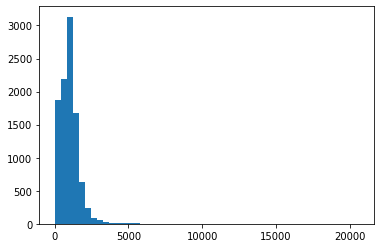

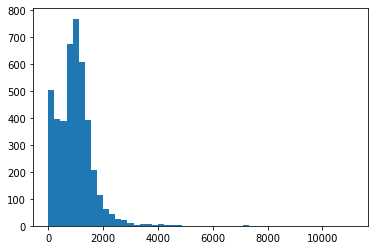

[[0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]]


In [13]:
data_multi = data(models_multiclass_clf['CNN_Skip_Gram_static'].vect_rep, articles_train, articles_test, 'articles')
data_multi.process()
data_multi.tokenise()
data_multi.plot()
data_multi.padding()
data_multi.encoding_labels()

### entrainement des modèles

In [14]:
for key in compiled_models_multiclass_clf :
  print(key)
  print(compiled_models_multiclass_clf[key])
  compiled_models_multiclass_clf[key].fit(x=data_multi.X_train,
          y=data_multi.y_train,
          batch_size=80,
          validation_split=0.33,
          epochs=20,
          verbose=1, callbacks=[k.callbacks.EarlyStopping('val_loss', patience=3)])

CNN_Skip_Gram_static
Epoch 1/20
84/84 [==============================] - 66s 245ms/step - loss: 0.9511 - accuracy: 0.6426 - val_loss: 0.7231 - val_accuracy: 0.7192
Epoch 2/20
84/84 [==============================] - 19s 228ms/step - loss: 0.6111 - accuracy: 0.7736 - val_loss: 0.7223 - val_accuracy: 0.7152
Epoch 3/20
84/84 [==============================] - 19s 231ms/step - loss: 0.4225 - accuracy: 0.8566 - val_loss: 0.6992 - val_accuracy: 0.7267
Epoch 4/20
84/84 [==============================] - 19s 227ms/step - loss: 0.2760 - accuracy: 0.9216 - val_loss: 0.6840 - val_accuracy: 0.7377
Epoch 5/20
84/84 [==============================] - 19s 225ms/step - loss: 0.1326 - accuracy: 0.9867 - val_loss: 0.7441 - val_accuracy: 0.7319
Epoch 6/20
84/84 [==============================] - 19s 226ms/step - loss: 0.0616 - accuracy: 0.9981 - val_loss: 0.7796 - val_accuracy: 0.7334
Epoch 7/20
84/84 [==============================] - 19s 227ms/step - loss: 0.0335 - accuracy: 0.9987 - val_loss: 0.8281 -

Calcul de l'accuracy de chaque modèle

In [15]:
# Évaluation 
import numpy as np
from sklearn.metrics import accuracy_score

print(models_multiclass_clf.keys())
accuracy_multiclass_clf = {key: None for key in models_multiclass_clf.keys()}

for key in models_multiclass_clf:
  accuracy_multiclass_clf[key] = np.argmax(compiled_models_multiclass_clf[key].predict(data_multi.X_test), axis=1)
  print("Accuracy on test data: %.4f" % accuracy_score(np.argmax(data_multi.y_test, axis=1), accuracy_multiclass_clf[key]))



dict_keys(['CNN_Skip_Gram_static'])
Accuracy on test data: 0.7320


Pour la classification multiclasse, le meilleur résultat que nous avons obtenu est avec le CNN_Skip_Gram_static avec une accuracy de 0,7320 après 20 epochs. 